# Experiement: Round Two | 19%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_19.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  72899  17769       1     167    70.0    150     90            2     1   
1  67122  15243       2     170    70.0    165     80            1     1   
2  61439  22598       1     161    90.0    120     80            1     1   
3  70752  18838       1     163    73.0    150     90            1     1   
4  24081  23435       1     151    54.0    120     80            3     3   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43029 entries, 0 to 43028
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           43029 non-null  int64  
 1   age          43029 non-null  int64  
 2   gender       43029 non-null  int64  
 3   height       43029 non-null  int64  
 4   weight       43029 non-null  float64
 5   ap_hi        43029 non-null  int64  
 6   ap_lo        43029 non-null  int64  
 7   cholesterol  43029 non-null  int64  
 8   gluc         43029 non-null  int64  
 9   smoke        43029 non-null  int64  
 10  alco         43029 non-null  int64  
 11  active       43029 non-null  int64  
 12  cardio       43029 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.3 MB


0    34679
1     8350
Name: cardio, dtype: int64

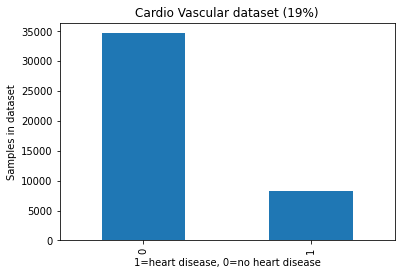

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (19%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

Balance ratio: 8350/43029 = 0,1940551

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
29430  61151  19034       1     151    71.0    140     90            1     1   
26146  51705  21383       1     170    78.0    120     80            1     1   
22136  40160  19763       1     161    73.0     80     60            2     1   
11898  11189  14606       1     162    59.0    120     80            1     1   
28202  57654  15810       2     170    74.0    130    100            1     1   

       smoke  alco  active  
29430      0     0       0  
26146      0     0       1  
22136      0     0       0  
11898      0     0       1  
28202      0     0       1

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     27743
           1       0.57      0.06      0.11      6680

    accuracy                           0.81     34423
   macro avg       0.69      0.52      0.50     34423
weighted avg       0.77      0.81      0.74     34423



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6936
           1       0.46      0.06      0.10      1670

    accuracy                           0.80      8606
   macro avg       0.64      0.52      0.50      8606
weighted avg       0.74      0.80      0.74      8606



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.744


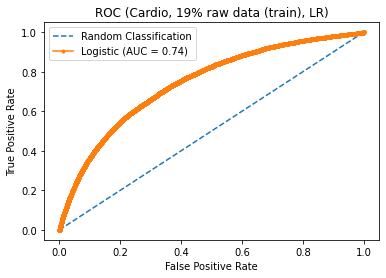

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.726


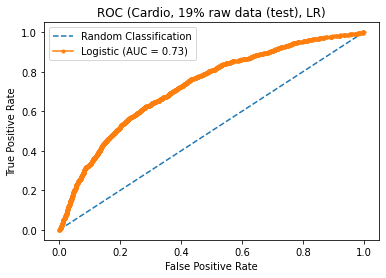

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     27743
           1       0.62      0.10      0.18      6680

    accuracy                           0.81     34423
   macro avg       0.72      0.54      0.54     34423
weighted avg       0.78      0.81      0.76     34423



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6936
           1       0.53      0.09      0.15      1670

    accuracy                           0.81      8606
   macro avg       0.67      0.53      0.52      8606
weighted avg       0.76      0.81      0.75      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.779


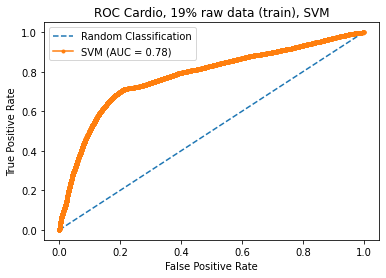

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.736


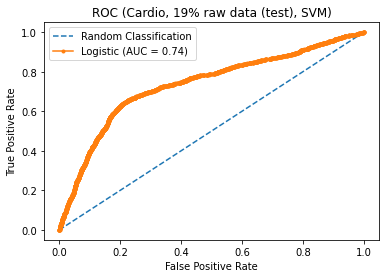

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.17346	validation_0-logloss:0.64522	validation_1-error:0.17976	validation_1-logloss:0.64590
[1]	validation_0-error:0.17328	validation_0-logloss:0.60589	validation_1-error:0.17906	validation_1-logloss:0.60714
[2]	validation_0-error:0.17250	validation_0-logloss:0.57358	validation_1-error:0.17836	validation_1-logloss:0.57522
[3]	validation_0-error:0.17119	validation_0-logloss:0.54652	validation_1-error:0.17720	validation_1-logloss:0.54880
[4]	validation_0-error:0.17250	validation_0-logloss:0.52384	validation_1-error:0.17790	validation_1-logloss:0.52660
[5]	validation_0-error:0.17096	validation_0-logloss:0.50453	validation_1-error:0.17778	validation_1-logloss:0.50792
[6]	validation_0-error:0.17041	validation_0-logloss:0.48822	validation_1-error:0.17732	validation_1-logloss:0.49215
[7]	validation_0-error:0.17056	validation_0-logloss:0.47421	validation_1-error:0.17790	validation_1-logloss:0.47846
[8]	validation_0-error:0.17079	validation_0-logloss:0.46226	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     27743
           1       0.60      0.42      0.50      6680

    accuracy                           0.83     34423
   macro avg       0.74      0.68      0.70     34423
weighted avg       0.82      0.83      0.82     34423



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6936
           1       0.56      0.40      0.47      1670

    accuracy                           0.82      8606
   macro avg       0.71      0.66      0.68      8606
weighted avg       0.81      0.82      0.81      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.818


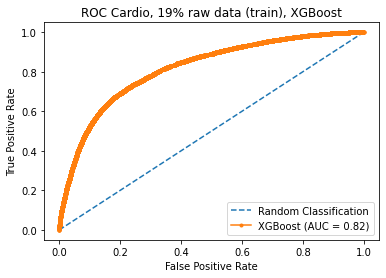

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.791


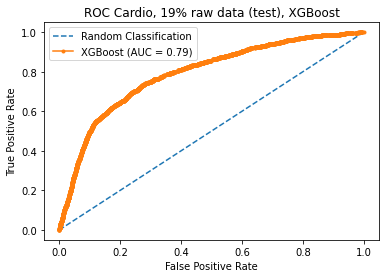

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
29430  61151  19034       1     151    71.0    140     90            1     1   
26146  51705  21383       1     170    78.0    120     80            1     1   
22136  40160  19763       1     161    73.0     80     60            2     1   
11898  11189  14606       1     162    59.0    120     80            1     1   
28202  57654  15810       2     170    74.0    130    100            1     1   

       smoke  alco  active  cardio  
29430      0     0       0       0  
26146      0     0       1       0  
22136      0     0       0       0  
11898      0     0       1       0  
28202      0     0       1       0


### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

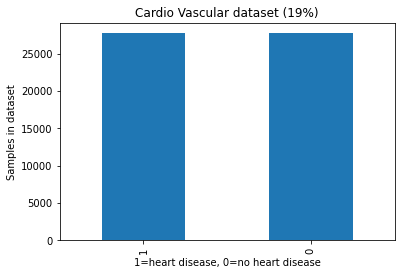

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (19%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72     27743
           1       0.72      0.69      0.71     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6936
           1       0.36      0.65      0.46      1670

    accuracy                           0.71      8606
   macro avg       0.63      0.69      0.63      8606
weighted avg       0.79      0.71      0.73      8606



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.776


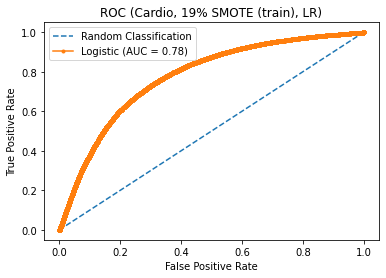

In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.742


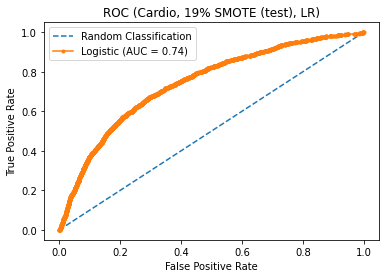

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     27743
           1       0.77      0.75      0.76     27743

    accuracy                           0.77     55486
   macro avg       0.77      0.77      0.77     55486
weighted avg       0.77      0.77      0.77     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      6936
           1       0.37      0.56      0.44      1670

    accuracy                           0.73      8606
   macro avg       0.62      0.66      0.63      8606
weighted avg       0.78      0.73      0.75      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.839


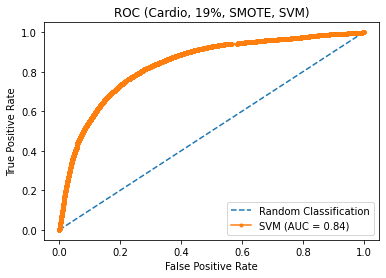

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.740


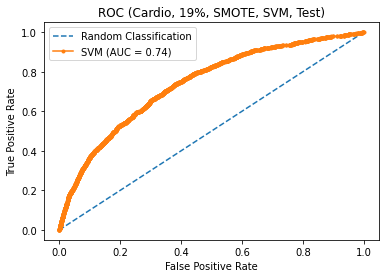

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.21052	validation_0-logloss:0.65595	validation_1-error:0.23588	validation_1-logloss:0.66197
[1]	validation_0-error:0.20895	validation_0-logloss:0.62350	validation_1-error:0.23135	validation_1-logloss:0.63498
[2]	validation_0-error:0.20256	validation_0-logloss:0.59695	validation_1-error:0.21532	validation_1-logloss:0.61282
[3]	validation_0-error:0.20888	validation_0-logloss:0.57569	validation_1-error:0.22624	validation_1-logloss:0.59515
[4]	validation_0-error:0.20248	validation_0-logloss:0.55624	validation_1-error:0.21020	validation_1-logloss:0.57903
[5]	validation_0-error:0.20072	validation_0-logloss:0.53703	validation_1-error:0.20683	validation_1-logloss:0.56408
[6]	validation_0-error:0.19859	validation_0-logloss:0.52211	validation_1-error:0.20706	validation_1-logloss:0.55276
[7]	validation_0-error:0.20333	validation_0-logloss:0.51114	validation_1-error:0.22194	validation_1-logloss:0.54378
[8]	validation_0-error:0.20302	validation_0-logloss:0.50191	validation_1

[71]	validation_0-error:0.15701	validation_0-logloss:0.36006	validation_1-error:0.20369	validation_1-logloss:0.45563
[72]	validation_0-error:0.15685	validation_0-logloss:0.35968	validation_1-error:0.20369	validation_1-logloss:0.45558
[73]	validation_0-error:0.15671	validation_0-logloss:0.35939	validation_1-error:0.20346	validation_1-logloss:0.45570
[74]	validation_0-error:0.15611	validation_0-logloss:0.35877	validation_1-error:0.20323	validation_1-logloss:0.45541
[75]	validation_0-error:0.15575	validation_0-logloss:0.35811	validation_1-error:0.20369	validation_1-logloss:0.45524
[76]	validation_0-error:0.15528	validation_0-logloss:0.35729	validation_1-error:0.20335	validation_1-logloss:0.45495
[77]	validation_0-error:0.15526	validation_0-logloss:0.35658	validation_1-error:0.20335	validation_1-logloss:0.45466
[78]	validation_0-error:0.15514	validation_0-logloss:0.35624	validation_1-error:0.20358	validation_1-logloss:0.45460
[79]	validation_0-error:0.15505	validation_0-logloss:0.35577	val

[141]	validation_0-error:0.14297	validation_0-logloss:0.33015	validation_1-error:0.20091	validation_1-logloss:0.44711
[142]	validation_0-error:0.14261	validation_0-logloss:0.32983	validation_1-error:0.20079	validation_1-logloss:0.44696
[143]	validation_0-error:0.14263	validation_0-logloss:0.32972	validation_1-error:0.20056	validation_1-logloss:0.44699
[144]	validation_0-error:0.14254	validation_0-logloss:0.32961	validation_1-error:0.20067	validation_1-logloss:0.44697
[145]	validation_0-error:0.14227	validation_0-logloss:0.32921	validation_1-error:0.20044	validation_1-logloss:0.44676
[146]	validation_0-error:0.14209	validation_0-logloss:0.32896	validation_1-error:0.20033	validation_1-logloss:0.44667
[147]	validation_0-error:0.14150	validation_0-logloss:0.32802	validation_1-error:0.20033	validation_1-logloss:0.44631
[148]	validation_0-error:0.14122	validation_0-logloss:0.32758	validation_1-error:0.20044	validation_1-logloss:0.44622
[149]	validation_0-error:0.14059	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     27743
           1       0.89      0.84      0.86     27743

    accuracy                           0.87     55486
   macro avg       0.87      0.87      0.87     55486
weighted avg       0.87      0.87      0.87     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6936
           1       0.49      0.46      0.47      1670

    accuracy                           0.80      8606
   macro avg       0.68      0.67      0.68      8606
weighted avg       0.80      0.80      0.80      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.941


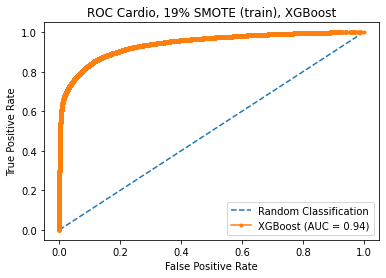

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.775


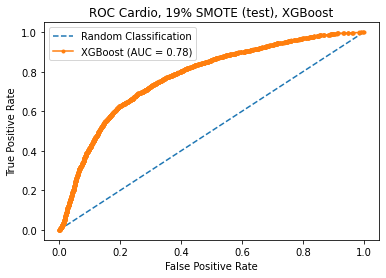

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1     6680
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1     6702
Name: cardio, dtype: int64

In [39]:
tvae = TVAE()

tvae.fit(tvae_result_df)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([tvae_result_df,samples])
tvae_result_df1['cardio'].value_counts()

0    27743
1     9509
Name: cardio, dtype: int64

In [40]:
tvae = TVAE()

tvae.fit(tvae_result_df1)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df2 = pd.concat([tvae_result_df1,samples])
tvae_result_df2['cardio'].value_counts()

0    27743
1    10640
Name: cardio, dtype: int64

In [41]:
tvae = TVAE()

tvae.fit(tvae_result_df2)
# Once trained generate samples
samples = tvae.sample(13000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df3 = pd.concat([tvae_result_df2,samples])
tvae_result_df3['cardio'].value_counts()

0    27743
1    10837
Name: cardio, dtype: int64

In [42]:
tvae = TVAE()

tvae.fit(tvae_result_df3)
# Once trained generate samples
samples = tvae.sample(15000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df4 = pd.concat([tvae_result_df3,samples])
tvae_result_df4['cardio'].value_counts()

0    27743
1    10850
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df4)
# Once trained generate samples
samples = tvae.sample(17000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df5 = pd.concat([tvae_result_df4,samples])
tvae_result_df5['cardio'].value_counts()

0    27743
1    17018
Name: cardio, dtype: int64

In [44]:
tvae = TVAE()

tvae.fit(tvae_result_df5)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df6 = pd.concat([tvae_result_df5,samples])
tvae_result_df6['cardio'].value_counts()

0    27743
1    24427
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(tvae_result_df6)
# Once trained generate samples
samples = tvae.sample(22000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df7 = pd.concat([tvae_result_df6,samples])
tvae_result_df7['cardio'].value_counts()

1    32347
0    27743
Name: cardio, dtype: int64

In [46]:
tvae_result_df_1 = tvae_result_df7[tvae_result_df7['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    32347
Name: cardio, dtype: int64

In [47]:
tvae_result_df_0 = tvae_result_df7[tvae_result_df7['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [48]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [49]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

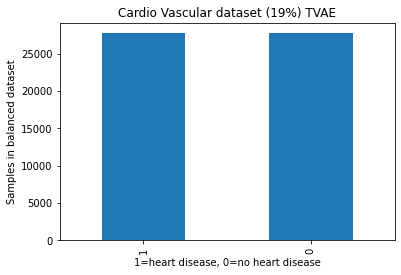

In [50]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (19%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [51]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [52]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74     27743
           1       0.73      0.80      0.77     27743

    accuracy                           0.75     55486
   macro avg       0.76      0.75      0.75     55486
weighted avg       0.76      0.75      0.75     55486



In [53]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      6936
           1       0.28      0.50      0.36      1670

    accuracy                           0.66      8606
   macro avg       0.57      0.60      0.56      8606
weighted avg       0.74      0.66      0.69      8606



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.807


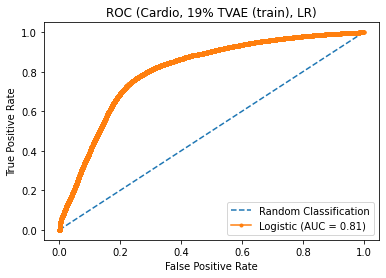

In [54]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.638


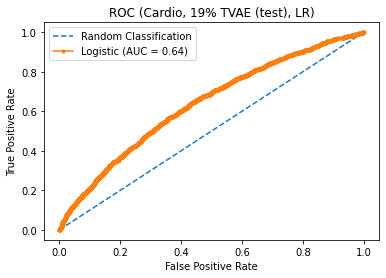

In [55]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with TVAE balanced data

In [56]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     27743
           1       0.97      0.78      0.87     27743

    accuracy                           0.88     55486
   macro avg       0.89      0.88      0.88     55486
weighted avg       0.89      0.88      0.88     55486



In [57]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6936
           1       0.45      0.11      0.17      1670

    accuracy                           0.80      8606
   macro avg       0.64      0.54      0.53      8606
weighted avg       0.75      0.80      0.75      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.946


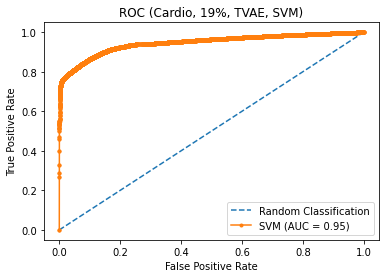

In [58]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.734


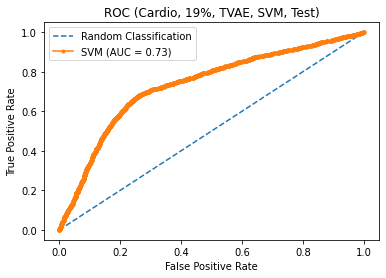

In [59]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [60]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.13301	validation_0-logloss:0.63590	validation_1-error:0.17999	validation_1-logloss:0.65242
[1]	validation_0-error:0.13301	validation_0-logloss:0.58915	validation_1-error:0.17999	validation_1-logloss:0.61892
[2]	validation_0-error:0.13301	validation_0-logloss:0.54993	validation_1-error:0.17999	validation_1-logloss:0.59045
[3]	validation_0-error:0.13301	validation_0-logloss:0.51709	validation_1-error:0.17999	validation_1-logloss:0.56694
[4]	validation_0-error:0.13301	validation_0-logloss:0.48714	validation_1-error:0.17999	validation_1-logloss:0.54630
[5]	validation_0-error:0.13301	validation_0-logloss:0.46316	validation_1-error:0.17999	validation_1-logloss:0.52931
[6]	validation_0-error:0.13301	validation_0-logloss:0.44078	validation_1-error:0.17999	validation_1-logloss:0.51418
[7]	validation_0-error:0.13450	validation_0-logloss:0.42174	validation_1-error:0.18115	validation_1-logloss:0.50165
[8]	validation_0-error:0.13450	validation_0-logloss:0.40598	validation_1

[71]	validation_0-error:0.10397	validation_0-logloss:0.24044	validation_1-error:0.18882	validation_1-logloss:0.40747
[72]	validation_0-error:0.10417	validation_0-logloss:0.24008	validation_1-error:0.18731	validation_1-logloss:0.40748
[73]	validation_0-error:0.10383	validation_0-logloss:0.23959	validation_1-error:0.18801	validation_1-logloss:0.40745
[74]	validation_0-error:0.10338	validation_0-logloss:0.23907	validation_1-error:0.18801	validation_1-logloss:0.40736
[75]	validation_0-error:0.10309	validation_0-logloss:0.23859	validation_1-error:0.18894	validation_1-logloss:0.40742
[76]	validation_0-error:0.10282	validation_0-logloss:0.23839	validation_1-error:0.18894	validation_1-logloss:0.40737
[77]	validation_0-error:0.10278	validation_0-logloss:0.23822	validation_1-error:0.18847	validation_1-logloss:0.40734
[78]	validation_0-error:0.10273	validation_0-logloss:0.23787	validation_1-error:0.18894	validation_1-logloss:0.40745
[79]	validation_0-error:0.10271	validation_0-logloss:0.23756	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     27743
           1       0.94      0.86      0.89     27743

    accuracy                           0.90     55486
   macro avg       0.90      0.90      0.90     55486
weighted avg       0.90      0.90      0.90     55486



In [62]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6936
           1       0.53      0.31      0.39      1670

    accuracy                           0.81      8606
   macro avg       0.69      0.62      0.64      8606
weighted avg       0.79      0.81      0.79      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.959


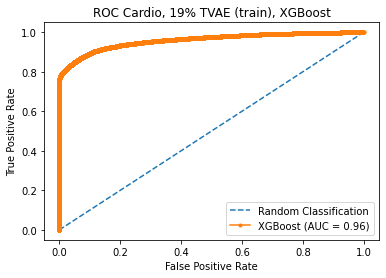

In [63]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.786


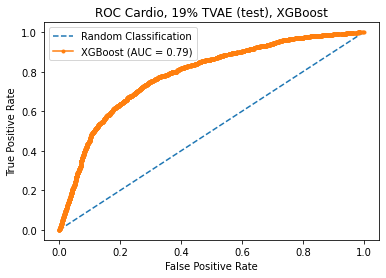

In [64]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [65]:
train_df_small = df_train.sample(n = 2000)

0    1589
1     411
Name: cardio, dtype: int64

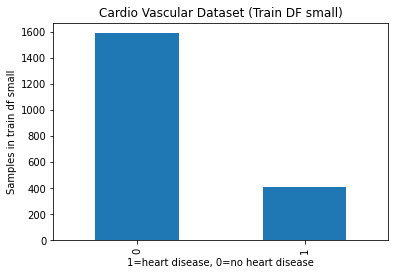

In [66]:
pd.value_counts(train_df_small['cardio']).plot.bar()
plt.title('Cardio Vascular Dataset (Train DF small)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in train df small')
train_df_small['cardio'].value_counts()

In [67]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_small, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(500)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    87
Name: cardio, dtype: int64

In [68]:
df_train['cardio'].value_counts()

0    27743
1     6680
Name: cardio, dtype: int64

In [69]:
ctgan_1 = df_train[df_train['cardio'] == 1]
ctgan_0 = df_train[df_train['cardio'] == 0]
ctgan_0_sm = ctgan_0.sample(n = 9000)
df_train_sm = samples.append(ctgan_0_sm)
df_train_sm = df_train_sm.append(ctgan_1)
df_train_sm['cardio'].value_counts()

0    9000
1    6767
Name: cardio, dtype: int64

In [70]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(7000)
samples1 = samples1[samples1['cardio'] ==1.0]
samples1['cardio'].value_counts()

1    3739
Name: cardio, dtype: int64

In [71]:
df_train_sm1 = df_train_sm.append(samples1)
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(10000)
samples2 = samples2[samples2['cardio'] ==1.0]
samples2['cardio'].value_counts()

1    5077
Name: cardio, dtype: int64

In [72]:
df_train_med1 = df_train_sm1.append(samples2) 
ctgan_0_med = ctgan_0.sample(n = 16000)
df_train_med = ctgan_0_med.append(df_train_med1)
df_train_med['cardio'].value_counts()

0    25000
1    15583
Name: cardio, dtype: int64

In [73]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples3 = ctgan.sample(20000)
samples3 = samples3[samples3['cardio'] ==1.0]
samples3['cardio'].value_counts()

1    7678
Name: cardio, dtype: int64

In [74]:
df_train_med_1 = df_train_med.append(samples3) 

ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med_1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples4 = ctgan.sample(20000)
samples4 = samples4[samples4['cardio'] ==1.0]
samples4['cardio'].value_counts()

1    11167
Name: cardio, dtype: int64

In [75]:
df_train_med_2 = df_train_med_1.append(samples4) 
df_train_med_2['cardio'].value_counts()

1    34428
0    25000
Name: cardio, dtype: int64

In [76]:
ctgan_1 = df_train_med_2[df_train_med_2['cardio'] == 1]
ctgan_0 = df_train[df_train['cardio'] == 0]

In [77]:
train_df_1_bal = ctgan_1.sample(n = 27743)

In [78]:
df_train_bal = train_df_1_bal.append(ctgan_0)

In [79]:
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [80]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

### Logistic Regression with CTGAN data

In [81]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     27743
           1       0.76      0.72      0.74     27743

    accuracy                           0.74     55486
   macro avg       0.74      0.74      0.74     55486
weighted avg       0.74      0.74      0.74     55486



In [82]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      6936
           1       0.37      0.59      0.45      1670

    accuracy                           0.72      8606
   macro avg       0.63      0.67      0.63      8606
weighted avg       0.78      0.72      0.75      8606



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.811


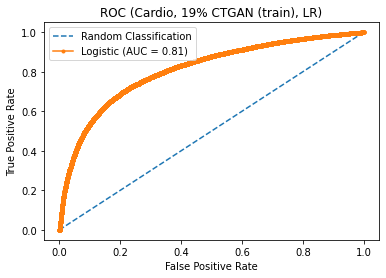

In [83]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.733


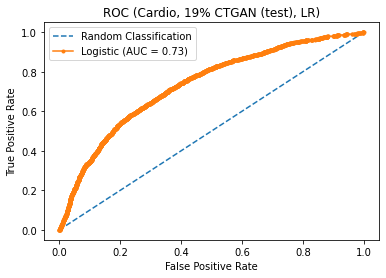

In [84]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

### SVM with CTGAN data

In [85]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80     27743
           1       0.82      0.75      0.78     27743

    accuracy                           0.79     55486
   macro avg       0.80      0.79      0.79     55486
weighted avg       0.80      0.79      0.79     55486



In [86]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      6936
           1       0.42      0.52      0.47      1670

    accuracy                           0.77      8606
   macro avg       0.65      0.68      0.66      8606
weighted avg       0.79      0.77      0.78      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.865


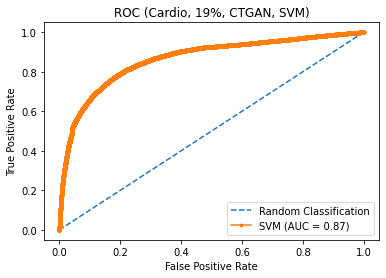

In [87]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.754


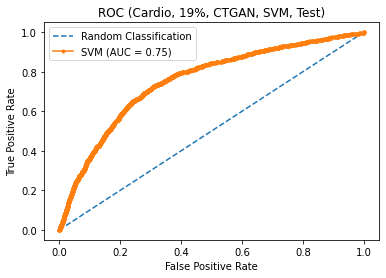

In [88]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### XGBoost with CTGAN data

In [89]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.17084	validation_0-logloss:0.64702	validation_1-error:0.18754	validation_1-logloss:0.65714
[1]	validation_0-error:0.17084	validation_0-logloss:0.60928	validation_1-error:0.18754	validation_1-logloss:0.62723
[2]	validation_0-error:0.15312	validation_0-logloss:0.57139	validation_1-error:0.19057	validation_1-logloss:0.59917
[3]	validation_0-error:0.16979	validation_0-logloss:0.54516	validation_1-error:0.18801	validation_1-logloss:0.57903
[4]	validation_0-error:0.17015	validation_0-logloss:0.52367	validation_1-error:0.18801	validation_1-logloss:0.56245
[5]	validation_0-error:0.17091	validation_0-logloss:0.50475	validation_1-error:0.18696	validation_1-logloss:0.54853
[6]	validation_0-error:0.16507	validation_0-logloss:0.48823	validation_1-error:0.18836	validation_1-logloss:0.53621
[7]	validation_0-error:0.16601	validation_0-logloss:0.47436	validation_1-error:0.18766	validation_1-logloss:0.52671
[8]	validation_0-error:0.16537	validation_0-logloss:0.46254	validation_1

[71]	validation_0-error:0.11888	validation_0-logloss:0.28756	validation_1-error:0.19603	validation_1-logloss:0.43710
[72]	validation_0-error:0.11852	validation_0-logloss:0.28658	validation_1-error:0.19579	validation_1-logloss:0.43723
[73]	validation_0-error:0.11817	validation_0-logloss:0.28589	validation_1-error:0.19591	validation_1-logloss:0.43722
[74]	validation_0-error:0.11816	validation_0-logloss:0.28573	validation_1-error:0.19579	validation_1-logloss:0.43719
[75]	validation_0-error:0.11763	validation_0-logloss:0.28487	validation_1-error:0.19568	validation_1-logloss:0.43693
[76]	validation_0-error:0.11754	validation_0-logloss:0.28457	validation_1-error:0.19568	validation_1-logloss:0.43682
[77]	validation_0-error:0.11733	validation_0-logloss:0.28410	validation_1-error:0.19545	validation_1-logloss:0.43695
[78]	validation_0-error:0.11736	validation_0-logloss:0.28387	validation_1-error:0.19579	validation_1-logloss:0.43684
[79]	validation_0-error:0.11711	validation_0-logloss:0.28340	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     27743
           1       0.90      0.86      0.88     27743

    accuracy                           0.88     55486
   macro avg       0.88      0.88      0.88     55486
weighted avg       0.88      0.88      0.88     55486



In [91]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6936
           1       0.50      0.39      0.44      1670

    accuracy                           0.80      8606
   macro avg       0.68      0.65      0.66      8606
weighted avg       0.79      0.80      0.80      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.949


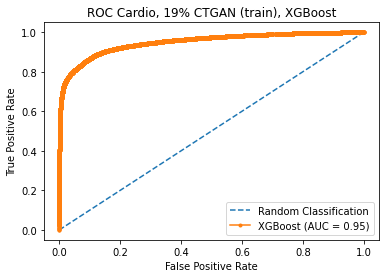

In [92]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.775


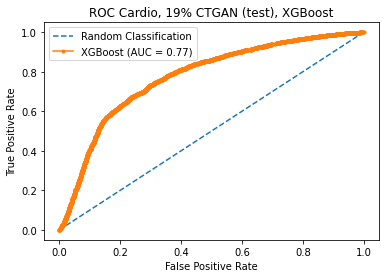

In [93]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()